In [7]:
import seaborn as sns
import pandas as pd
import numpy as np

In [6]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-10.4.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.1.4-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.9.2-cp312-cp312-win_amd64.whl (7.8 MB)
Using cached contourpy-1.3.0-cp312-cp312-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 1.9 MB/s eta 0:00:01
   ------------------- -------------------- 1.0/2.2 MB 2

In [1]:
!pip install pgeocode

In [2]:
import pgeocode

In [149]:
df = pd.read_csv("2016-2018.csv")

C:\Users\adity\AppData\Local\Temp\ipykernel_76692\848496009.py:1: DtypeWarning:

Columns (0,4,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [150]:

df.head()

,6a. \nStreet #,6b. \nStreet Name,6c. \nStreet Suffix,6d.\n Unit #,6e. \nZip,7. \nUndergraduate (U) or Graduate (G),8. \nFull-time (FT) or \nPart-time (PT),9. \n 5 or More Undergrads/Unit\n(Y/N),University,Year,Unnamed: 10
0,45,Province,Street,1106,02108,U,FT,N,Bay State College,2016-2017,NaN
1,48,Richfield,Street,NaN,02125,U,FT,N,Bay State College,2016-2017,NaN
2,40,Langdon,Street,NaN,02119,U,FT,N,Bay State College,2016-2017,NaN
3,42,Langdon,Street,NaN,02119,U,FT,N,Bay State College,2016-2017,NaN
4,59,B Street,Street,3015,02127,U,FT,N,Bay State College,2016-2017,NaN


In [151]:
df.columns

Index(['6a. \nStreet #', '6b. \nStreet Name', '6c. \nStreet Suffix  ',
       '6d.\n Unit #', '6e. \nZip', '7. \nUndergraduate (U) or Graduate (G)',
       '8. \nFull-time (FT) or \nPart-time (PT)',
       '9. \n 5 or More Undergrads/Unit\n(Y/N)', 'University', 'Year',
       'Unnamed: 10'],
      dtype='object')

In [152]:
df.drop(["Unnamed: 10"],axis=1,inplace=True)

In [64]:
df.columns = ["Street#","Street Name","Street Suffix","Unit#","Zip","U or G","FT or PT","5 or more","Uni","Year"]

In [153]:
def fix_zip(zip):
    zip=str(zip)
    if len(zip)<5:
        zip="0"+zip
    elif len(zip)>5:
        zip="0"+zip[0:4]
    elif "-" in zip:
        t = zip.split("-")
        zip=t[0]
    return str(zip.strip())

In [154]:
df["6e. \nZip"]=df["6e. \nZip"].apply(fix_zip)

In [155]:
df

,6a. \nStreet #,6b. \nStreet Name,6c. \nStreet Suffix,6d.\n Unit #,6e. \nZip,7. \nUndergraduate (U) or Graduate (G),8. \nFull-time (FT) or \nPart-time (PT),9. \n 5 or More Undergrads/Unit\n(Y/N),University,Year
0,45,Province,Street,1106,00210,U,FT,N,Bay State College,2016-2017
1,48,Richfield,Street,NaN,00212,U,FT,N,Bay State College,2016-2017
2,40,Langdon,Street,NaN,00211,U,FT,N,Bay State College,2016-2017
3,42,Langdon,Street,NaN,00211,U,FT,N,Bay State College,2016-2017
4,59,B Street,Street,3015,00212,U,FT,N,Bay State College,2016-2017
...,...,...,...,...,...,...,...,...,...,...
84614,1.0,PARK LANE,NaN,APT 1410,02210,G,FT,NaN,Northeastern University,2017-2018
84615,15.0,CHILCOTT PLACE,NaN,#1,02130,G,FT,NaN,Northeastern University,2017-2018
84616,15.0,SYMPHONY,RD,APT2,02215,G,FT,NaN,Northeastern University,2017-2018
84617,37.0,PAUL GORE,STREET,#3,02130,G,FT,NaN,Northeastern University,2017-2018


In [156]:
df["6e. \nZip"].unique()

array(['00210', '00212', '00211', '00213', '00281', '02119', '00221',
       '02134', '02136', '02215', '02446', '02115', '00219', '02199',
       '02130', '02118', '02135', '02116', '02131', '02139', '02127',
       '02108', '02128', '02114', '02125', '02120', '02111', '02113',
       '02210', '01921', '02126', '02132', '02110', '02121', '02129',
       '02122', '02124', '02152', '02109', '02171', '02167', '02298',
       '02146', '0nan', '02214', '02201', '02117', '02163', '02324',
       '02212', '02138', '02102', '02103', '02112', '02205', '02228',
       '02123', '02216', '00244', '02150', '02445', '00215', '00246',
       '02467', '0P', '0F', '02196', '00217', '00220', '01902', '02315',
       '01235', '01760', '02133', '02840', '02141', '02149', '02151'],
      dtype=object)

In [157]:
df.to_csv("final_2016-2018.csv")

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84619 entries, 0 to 84618
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Street#        82025 non-null  object
 1   Street Name    81235 non-null  object
 2   Street Suffix  71072 non-null  object
 3   Unit#          59280 non-null  object
 4   Zip            84619 non-null  object
 5   U or G         84619 non-null  object
 6   FT or PT       84513 non-null  object
 7   5 or more      57642 non-null  object
 8   Uni            84619 non-null  object
 9   Year           84619 non-null  object
dtypes: object(10)
memory usage: 6.5+ MB


In [81]:
df.astype("str")

,Street#,Street Name,Street Suffix,Unit#,Zip,U or G,FT or PT,5 or more,Uni,Year
0,45,Province,Street,1106,02108,U,FT,N,Bay State College,2016-2017
1,48,Richfield,Street,nan,02125,U,FT,N,Bay State College,2016-2017
2,40,Langdon,Street,nan,02119,U,FT,N,Bay State College,2016-2017
3,42,Langdon,Street,nan,02119,U,FT,N,Bay State College,2016-2017
4,59,B Street,Street,3015,02127,U,FT,N,Bay State College,2016-2017
...,...,...,...,...,...,...,...,...,...,...
84614,1.0,PARK LANE,nan,APT 1410,02210,G,FT,nan,Northeastern University,2017-2018
84615,15.0,CHILCOTT PLACE,nan,#1,02130,G,FT,nan,Northeastern University,2017-2018
84616,15.0,SYMPHONY,RD,APT2,02215,G,FT,nan,Northeastern University,2017-2018
84617,37.0,PAUL GORE,STREET,#3,02130,G,FT,nan,Northeastern University,2017-2018


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84619 entries, 0 to 84618
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Street#        82025 non-null  object
 1   Street Name    81235 non-null  object
 2   Street Suffix  71072 non-null  object
 3   Unit#          59280 non-null  object
 4   Zip            84619 non-null  object
 5   U or G         84619 non-null  object
 6   FT or PT       84513 non-null  object
 7   5 or more      57642 non-null  object
 8   Uni            84619 non-null  object
 9   Year           84619 non-null  object
dtypes: object(10)
memory usage: 6.5+ MB


<Axes: xlabel='Year', ylabel='count'>

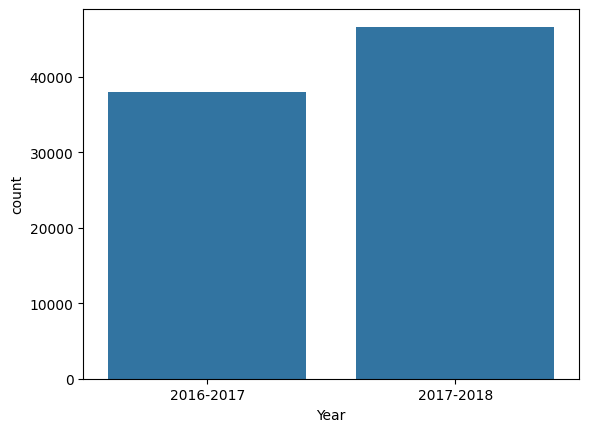

In [72]:
sns.countplot(df,x="Year")

In [92]:
df.head()

,Street#,Street Name,Street Suffix,Unit#,Zip,U or G,FT or PT,5 or more,Uni,Year
0,45,Province,Street,1106,02108,U,FT,N,Bay State College,2016-2017
1,48,Richfield,Street,NaN,02125,U,FT,N,Bay State College,2016-2017
2,40,Langdon,Street,NaN,02119,U,FT,N,Bay State College,2016-2017
3,42,Langdon,Street,NaN,02119,U,FT,N,Bay State College,2016-2017
4,59,B Street,Street,3015,02127,U,FT,N,Bay State College,2016-2017


In [73]:
nomi = pgeocode.Nominatim('us')

In [76]:
nomi.query_postal_code("02108").keys

<bound method Series.keys of postal_code               02108
country_code                 US
place_name               Boston
state_name        Massachusetts
state_code                   MA
county_name             Suffolk
county_code                25.0
community_name              NaN
community_code              NaN
latitude                42.3576
longitude              -71.0684
accuracy                    4.0
Name: 0, dtype: object>

In [85]:
df2=nomi.query_postal_code(np.array(df["Zip"]))

In [102]:
df2.head(500)

,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,02108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,02119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,02127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,02215,US,Boston,Massachusetts,MA,Suffolk,25.0,NaN,NaN,42.3471,-71.1027,4.0
496,02215,US,Boston,Massachusetts,MA,Suffolk,25.0,NaN,NaN,42.3471,-71.1027,4.0
497,02215,US,Boston,Massachusetts,MA,Suffolk,25.0,NaN,NaN,42.3471,-71.1027,4.0
498,02215,US,Boston,Massachusetts,MA,Suffolk,25.0,NaN,NaN,42.3471,-71.1027,4.0


In [107]:
df2.columns

Index(['postal_code', 'country_code', 'place_name', 'state_name', 'state_code',
       'county_name', 'county_code', 'community_name', 'community_code',
       'latitude', 'longitude', 'accuracy'],
      dtype='object')

In [100]:
def get_lat_long(zip):
    zip=str(zip)
    x=nomi.query_postal_code(zip)
    lat=x["latitude"]
    long=x["longitude"]
    return (lat,long)

In [109]:
temp = pd.concat([df,df2[["latitude","longitude"]]],axis=1)

In [110]:
temp.columns

Index(['Street#', 'Street Name', 'Street Suffix', 'Unit#', 'Zip', 'U or G',
       'FT or PT', '5 or more', 'Uni', 'Year', 'latitude', 'longitude'],
      dtype='object')

In [111]:
temp.tail()

,Street#,Street Name,Street Suffix,Unit#,Zip,U or G,FT or PT,5 or more,Uni,Year,latitude,longitude
84614,1.0,PARK LANE,NaN,APT 1410,02210,G,FT,NaN,Northeastern University,2017-2018,42.3489,-71.0465
84615,15.0,CHILCOTT PLACE,NaN,#1,02130,G,FT,NaN,Northeastern University,2017-2018,42.3126,-71.1115
84616,15.0,SYMPHONY,RD,APT2,02215,G,FT,NaN,Northeastern University,2017-2018,42.3471,-71.1027
84617,37.0,PAUL GORE,STREET,#3,02130,G,FT,NaN,Northeastern University,2017-2018,42.3126,-71.1115
84618,300.0,HARRISON,AVENUE,#2-232,02118,G,FT,NaN,Northeastern University,2017-2018,42.3362,-71.0729


In [131]:
import matplotlib.pyplot as plt

In [137]:
!pip install plotly==5.24.1

   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   --- ------------------------------------ 1.6/19.1 MB 12.0 MB/s eta 0:00:02
   ------- -------------------------------- 3.7/19.1 MB 10.4 MB/s eta 0:00:02
   ----------- ---------------------------- 5.2/19.1 MB 9.7 MB/s eta 0:00:02
   --------------- ------------------------ 7.6/19.1 MB 10.0 MB/s eta 0:00:02
   -------------------- ------------------- 9.7/19.1 MB 10.1 MB/s eta 0:00:01
   ------------------------ --------------- 11.8/19.1 MB 10.0 MB/s eta 0:00:01
   ------------------------------ --------- 14.4/19.1 MB 10.5 MB/s eta 0:00:01
   ----------------------------------- ---- 16.8/19.1 MB 10.7 MB/s eta 0:00:01
   ---------------------------------------  18.6/19.1 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 10.4 MB/s eta 0:00:00


In [138]:
import plotly.express as px

In [148]:
temp.groupby(["Zip","Uni"]).count()

Street#  Street Name  \
Zip        Uni                                                        
000F       Simmons College                          24           24   
000P       Simmons College                         560          559   
00nan      Boston Conservatory at Berklee            1            1   
           Fisher College                            2            2   
01235      Berklee College of Music                  1            1   
...                                                ...          ...   
02467      St. John's Seminary                       2            2   
02813      Bay State College                         1            1   
02840      Emmanuel College                          1            1   
21212747   University of Massachusetts-Boston        1            1   
21354424   University of Massachusetts-Boston        1            1   

                                               Street Suffix  Unit#  U or G  \
Zip        Uni                                                                
000F       Simmons College                                24      8      24   
000P       Simmons College                               537    333     560   
00nan      Boston Conservatory at Berklee                  1      1       1   
           Fisher College                                  2      0       2   
01235      Berklee College of Music                        1      1       1   
...                                                      ...    ...     ...   
02467      St. John's Seminary                             0      0       2   
02813      Bay State College                               1      0       1   
02840      Emmanuel College                                1      0       1   
21212747   University of Massachusetts-Boston              1      0       1   
21354424   University of Massachusetts-Boston              1      0       1   

                                               FT or PT  5 or more  Year  \
Zip        Uni                                                             
000F       Simmons College                           24         24    24   
000P       Simmons College                          560        560   560   
00nan      Boston Conservatory at Berklee             1          1     1   
           Fisher College                             2          0     2   
01235      Berklee College of Music                   1          1     1   
...                                                 ...        ...   ...   
02467      St. John's Seminary                        2          2     2   
02813      Bay State College                          1          1     1   
02840      Emmanuel College                           1          0     1   
21212747   University of Massachusetts-Boston         1          1     1   
21354424   University of Massachusetts-Boston         1          1     1   

                                               latitude  longitude  
Zip        Uni                                                      
000F       Simmons College                            0          0  
000P       Simmons College                            0          0  
00nan      Boston Conservatory at Berklee             0          0  
           Fisher College                             0          0  
01235      Berklee College of Music                   1          1  
...                                                 ...        ...  
02467      St. John's Seminary                        2          2  
02813      Bay State College                          0          0  
02840      Emmanuel College                           1          1  
21212747   University of Massachusetts-Boston         0          0  
21354424   University of Massachusetts-Boston         0          0  

[943 rows x 10 columns]

In [147]:
temp["Zip"].unique()

array(['02108     ', '02125     ', '02119     ', '02127     ',
       '02128     ', '02118     ', '02124     ', '02121     ',
       '02134     ', '02124', '02122     ', '02111     ', '02126     ',
       '02120     ', '02115     ', '02116     ', '02136     ',
       '02132     ', '02130     ', '02129     ', '02114     ',
       '02113     ', '02813     ', '02119', '02215', '02136', '02115',
       '02134', '02135', '02125', '02130', '02116', '02108', '02446',
       '02131', '02128', '02114', '02121', '02199', '02120', '02118',
       '02110', '02129', '02127', '02132', '02210', '02113', '02122',
       '02111', '02139', '01921', '02126', '02152', '02109', '02171',
       '02167', '02298', '02146', '00nan', '02214', '02201', '02117',
       '02163', '02324', '02212', '02138', '02102', '02103', '02112',
       '02205', '02228', '02123', '02216', '02445', '02150', '02151',
       '02467', '000P', '000F', '02196', '21212747', '01902', '02315',
       '01235', '01760', '02133', '02840', '